In [1]:
import pandas as pd
import numpy as np

In [22]:
boston = pd.read_csv('HousingData.csv')

In [23]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [24]:
boston.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [25]:
boston.dropna(inplace=True)

In [26]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


<AxesSubplot:>

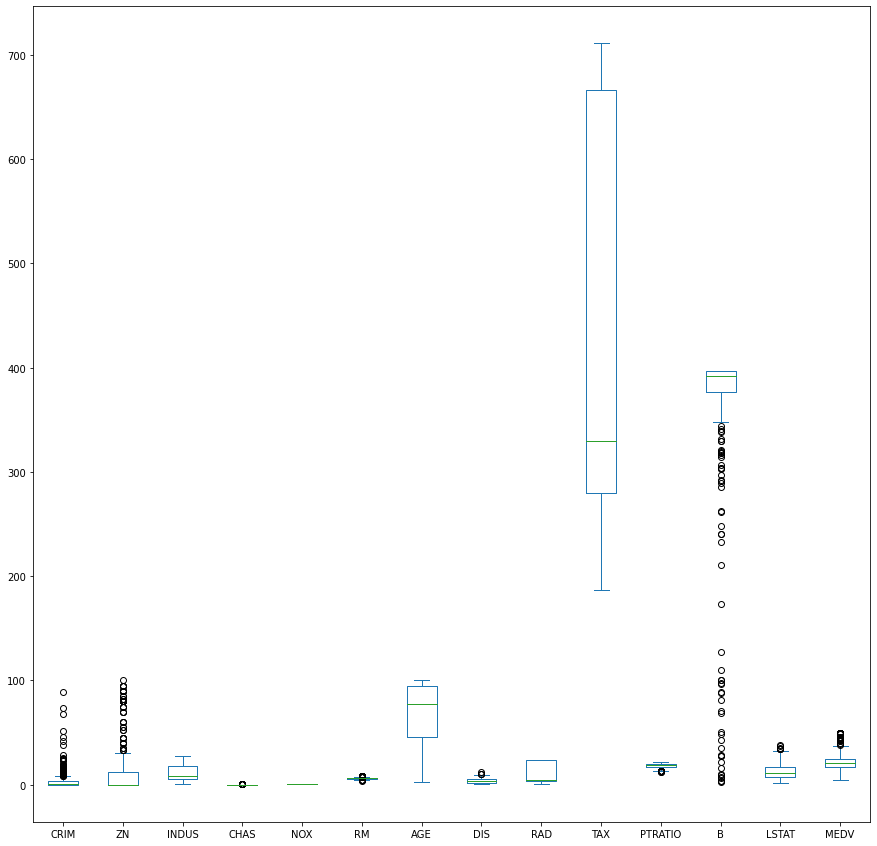

In [27]:
boston.plot(kind='box', figsize=(15,15))

In [35]:
def remove_outliers(data,col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3-q1
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    boston[col] = np.clip(data[col],low,high)
    return data

def treat_outliers(data, cols):
    for col in cols:
        data1 = remove_outliers(data,col)
    return data1

In [36]:
list(boston.columns)

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'MEDV']

In [37]:
treat_outliers(boston, boston.iloc[:,0::])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


<AxesSubplot:>

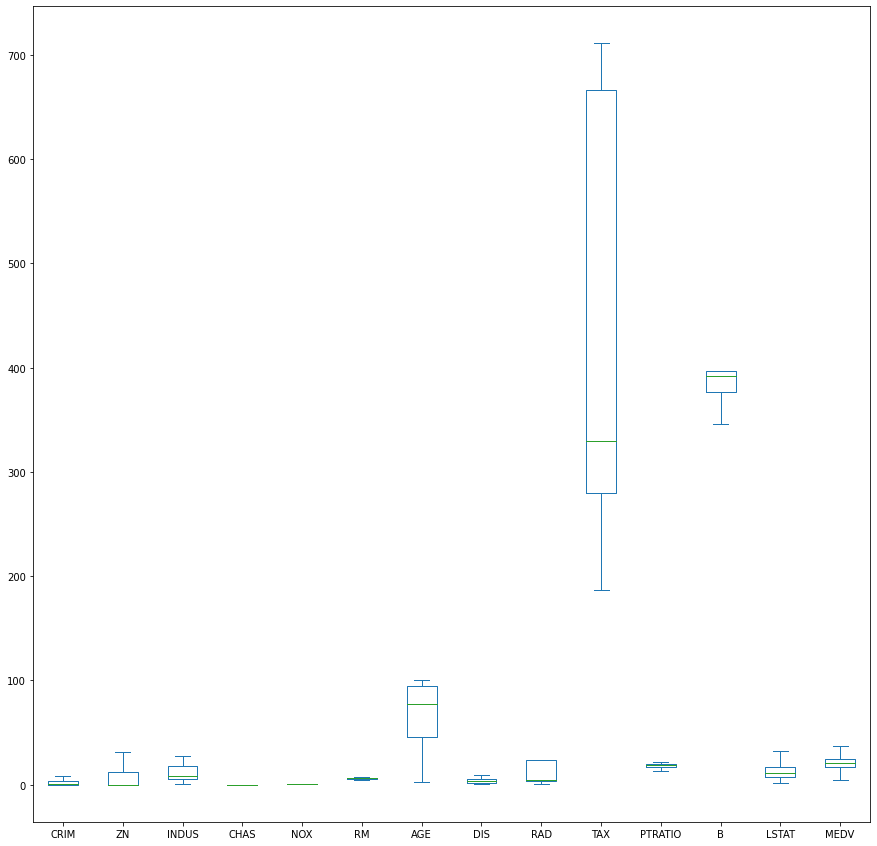

In [38]:
boston.plot(kind='box', figsize=(15,15))

In [39]:
import tensorflow as tf
from  tensorflow import keras

c:\Users\Hitesh\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [41]:
from  sklearn.preprocessing import StandardScaler
from  sklearn.model_selection import train_test_split

In [42]:
scaler = StandardScaler()
X = boston.drop('MEDV', axis=1)
y = boston['MEDV']

In [43]:
columns = list(X.columns)

In [44]:
X[columns] = scaler.fit_transform(X[columns])

c:\Users\Hitesh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
c:\Users\Hitesh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
model = keras.Sequential([
    keras.layers.Dense(15, input_shape=(13,),activation='relu'),
    keras.layers.Dense(13, activation='relu'),
    keras.layers.Dense(1,activation='relu')
])

In [47]:
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [49]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
8/8 [==============================] - 1s 27ms/step - loss: 20.9095 - mean_absolute_error: 20.9095 - val_loss: 20.4298 - val_mean_absolute_error: 20.4298
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 20.6625 - mean_absolute_error: 20.6625 - val_loss: 20.1749 - val_mean_absolute_error: 20.1749
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 20.3826 - mean_absolute_error: 20.3826 - val_loss: 19.8886 - val_mean_absolute_error: 19.8886
Epoch 4/100
8/8 [==============================] - 0s 7ms/step - loss: 20.0741 - mean_absolute_error: 20.0741 - val_loss: 19.5610 - val_mean_absolute_error: 19.5610
Epoch 5/100
8/8 [==============================] - 0s 6ms/step - loss: 19.7172 - mean_absolute_error: 19.7172 - val_loss: 19.1820 - val_mean_absolute_error: 19.1820
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 19.3021 - mean_absolute_error: 19.3021 - val_loss: 18.7486 - val_mean_absolute_error: 18.7486
Epoch 7/1